## DATA INFORMATION
The data gives the information about a company XYZ which has offices in four different zones and their sales data for different months.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [2]:
dt=pd.read_csv("Sales_data_zone_wise.csv")

In [3]:
dt.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [4]:
dt.shape

(29, 5)

In [5]:

dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [6]:
dt.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

No null values present in the given data

In [7]:
dt.describe().round(1)

,Zone - A,Zone - B,Zone - C,Zone - D
count,29.0,29.0,29.0,29.0
mean,1540493.1,1755559.6,1772871.0,1842926.8
std,261940.1,168389.9,333193.7,375016.5
min,1128185.0,1527574.0,1237722.0,1234311.0
25%,1305972.0,1606010.0,1523308.0,1520406.0
50%,1534390.0,1740365.0,1767047.0,1854412.0
75%,1820196.0,1875658.0,2098463.0,2180416.0
max,2004480.0,2091194.0,2290580.0,2364132.0


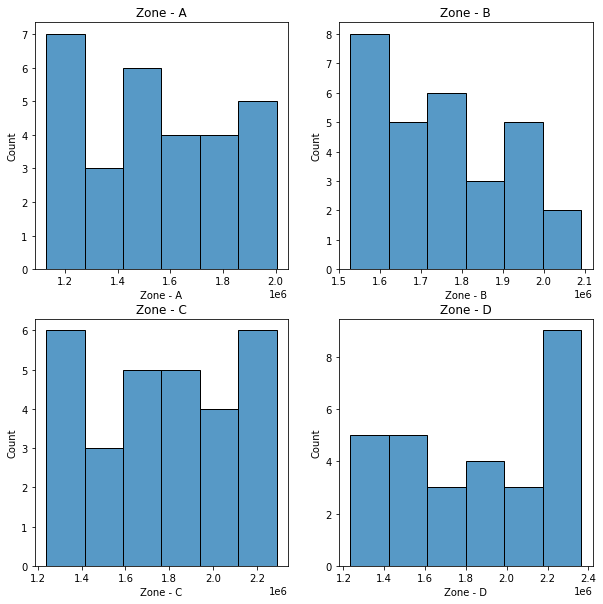

In [8]:
fig, axes=plt.subplots(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(x="Zone - A",data=dt)
plt.title("Zone - A")

plt.subplot(2,2,2)
sns.histplot(x="Zone - B",data=dt)
plt.title("Zone - B")

plt.subplot(2,2,3)
sns.histplot(x="Zone - C",data=dt)
plt.title("Zone - C")

plt.subplot(2,2,4)
sns.histplot(x="Zone - D",data=dt)
plt.title("Zone - D")
plt.show()

In [9]:
import warnings
warnings.filterwarnings(action="ignore")

### 1. The mean sales generated by each zone

In [10]:
dt.mean().round(2)

Zone - A    1540493.14
Zone - B    1755559.59
Zone - C    1772871.03
Zone - D    1842926.76
dtype: float64

Here the highest mean sale is for Zone D and the least mean sale is for Zone A.

### 2.Total sales generated by all the zones for each month

In [11]:
dt["Total Sales"]=dt.sum(axis=1)
dt.head()


,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total Sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328


In [12]:
dt["Total Sales"].describe().round(1)

count         29.0
mean     6911850.5
std       590891.9
min      5925424.0
25%      6506659.0
50%      7032783.0
75%      7155515.0
max      8174449.0
Name: Total Sales, dtype: float64

* The mean of the total sale is  6911850.5
* The maximum total sale is 8174449.0
* The minimum total sale is  5925424.0

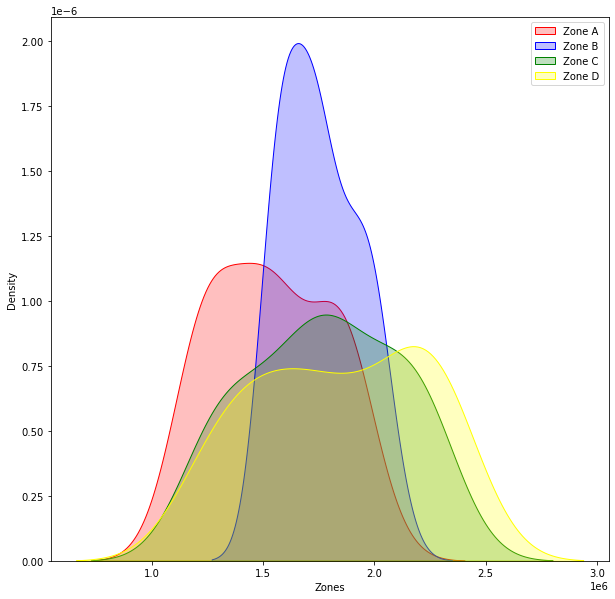

In [13]:
plt.figure(figsize=(10,10))
sns.kdeplot(dt["Zone - A"],color="red",shade=True,Label="Zone A")
sns.kdeplot(dt["Zone - B"],color="blue",shade=True,Label="Zone B")
sns.kdeplot(dt["Zone - C"],color="green",shade=True,Label="Zone C")
sns.kdeplot(dt["Zone - D"],color="yellow",shade=True,Label="Zone D")
plt.legend()
plt.xlabel("Zones")
plt.show()

<AxesSubplot:xlabel='Zone - D', ylabel='Density'>

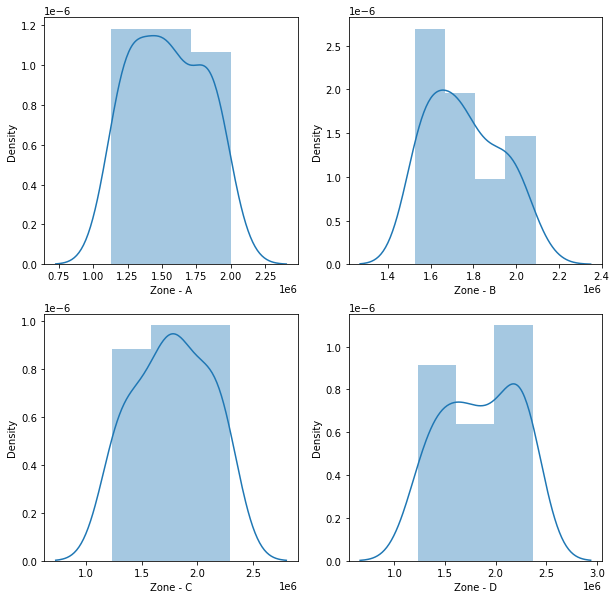

In [14]:
fig,axes = plt.subplots(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(dt["Zone - A"])

plt.subplot(2,2,2)
sns.distplot(dt["Zone - B"])

plt.subplot(2,2,3)
sns.distplot(dt["Zone - C"])

plt.subplot(2,2,4)
sns.distplot(dt["Zone - D"])

We can infer that Zone C is normally distributed as compared to other Zones.

### 3.  Check whether all the zones generate the same amount of sales.

### Testing the hypothesis
### Here we are using One way ANOVA test
### H0(Null Hypothesis) = All the zones generate the same amount of sales
### H1(Alternate Hypothesis) = All the zones generate different amount of sales

In [15]:
# importing library from scipy.stats for oneway anova test
from scipy.stats import stats
fvalue,pvalue=stats.f_oneway(dt["Zone - A"],dt["Zone - B"],dt["Zone - C"], dt["Zone - D"])
print("f value is",fvalue)
print("p value is",pvalue)
if pvalue<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

f value is 5.672056106843581
p value is 0.0011827601694503335
Reject null hypothesis


#### From this it can be inferred that all the zones generate different amount of sales.